# Importing Dependencies


In [49]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# importing data


In [5]:
train=pd.read_csv("./datasets/Playground_series/train.csv")
test=pd.read_csv("./datasets/Playground_series/test.csv")
sub=pd.read_csv("./datasets/Playground_series/sample_submission.csv")

In [6]:
train.head()

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [8]:
test.head()

id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898   Lucchese          586    France  Female  23.0       2   
1  165035    15782418       Nott          683    France  Female  46.0       2   
2  165036    15807120         K?          656    France  Female  34.0       7   
3  165037    15808905  O'Donnell          681    France    Male  36.0       8   
4  165038    15607314    Higgins          752   Germany    Male  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2        0.0             1.0        160976.75  
1       0.00              1        1.0             0.0         72549.27  
2       0.00              2        1.0             0.0        138882.09  
3       0.00              1        1.0             0.0        113931.57  
4  121263.62              1        1.0             0.0        139431.00

In [37]:
sub.head()

id  Exited
0  165034     0.5
1  165035     0.5
2  165036     0.5
3  165037     0.5
4  165038     0.5

## data Preprocessing  

In [9]:
train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
print(train.head())
print('='*40,'\n')
print(train.dtypes)

   id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4 

In [13]:
train['Age']=train['Age'].astype('int64')
train['HasCrCard']=train['HasCrCard'].astype('int64')
train['IsActiveMember']=train['IsActiveMember'].astype('int64')

In [14]:
train.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [16]:
train['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [20]:
#Geography mapping
label_encoder=LabelEncoder()
train['Geography']=label_encoder.fit_transform(train['Geography'])
train['Gender']=label_encoder.fit_transform(train['Gender'])

In [21]:
train.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography            int64
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## EDA

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


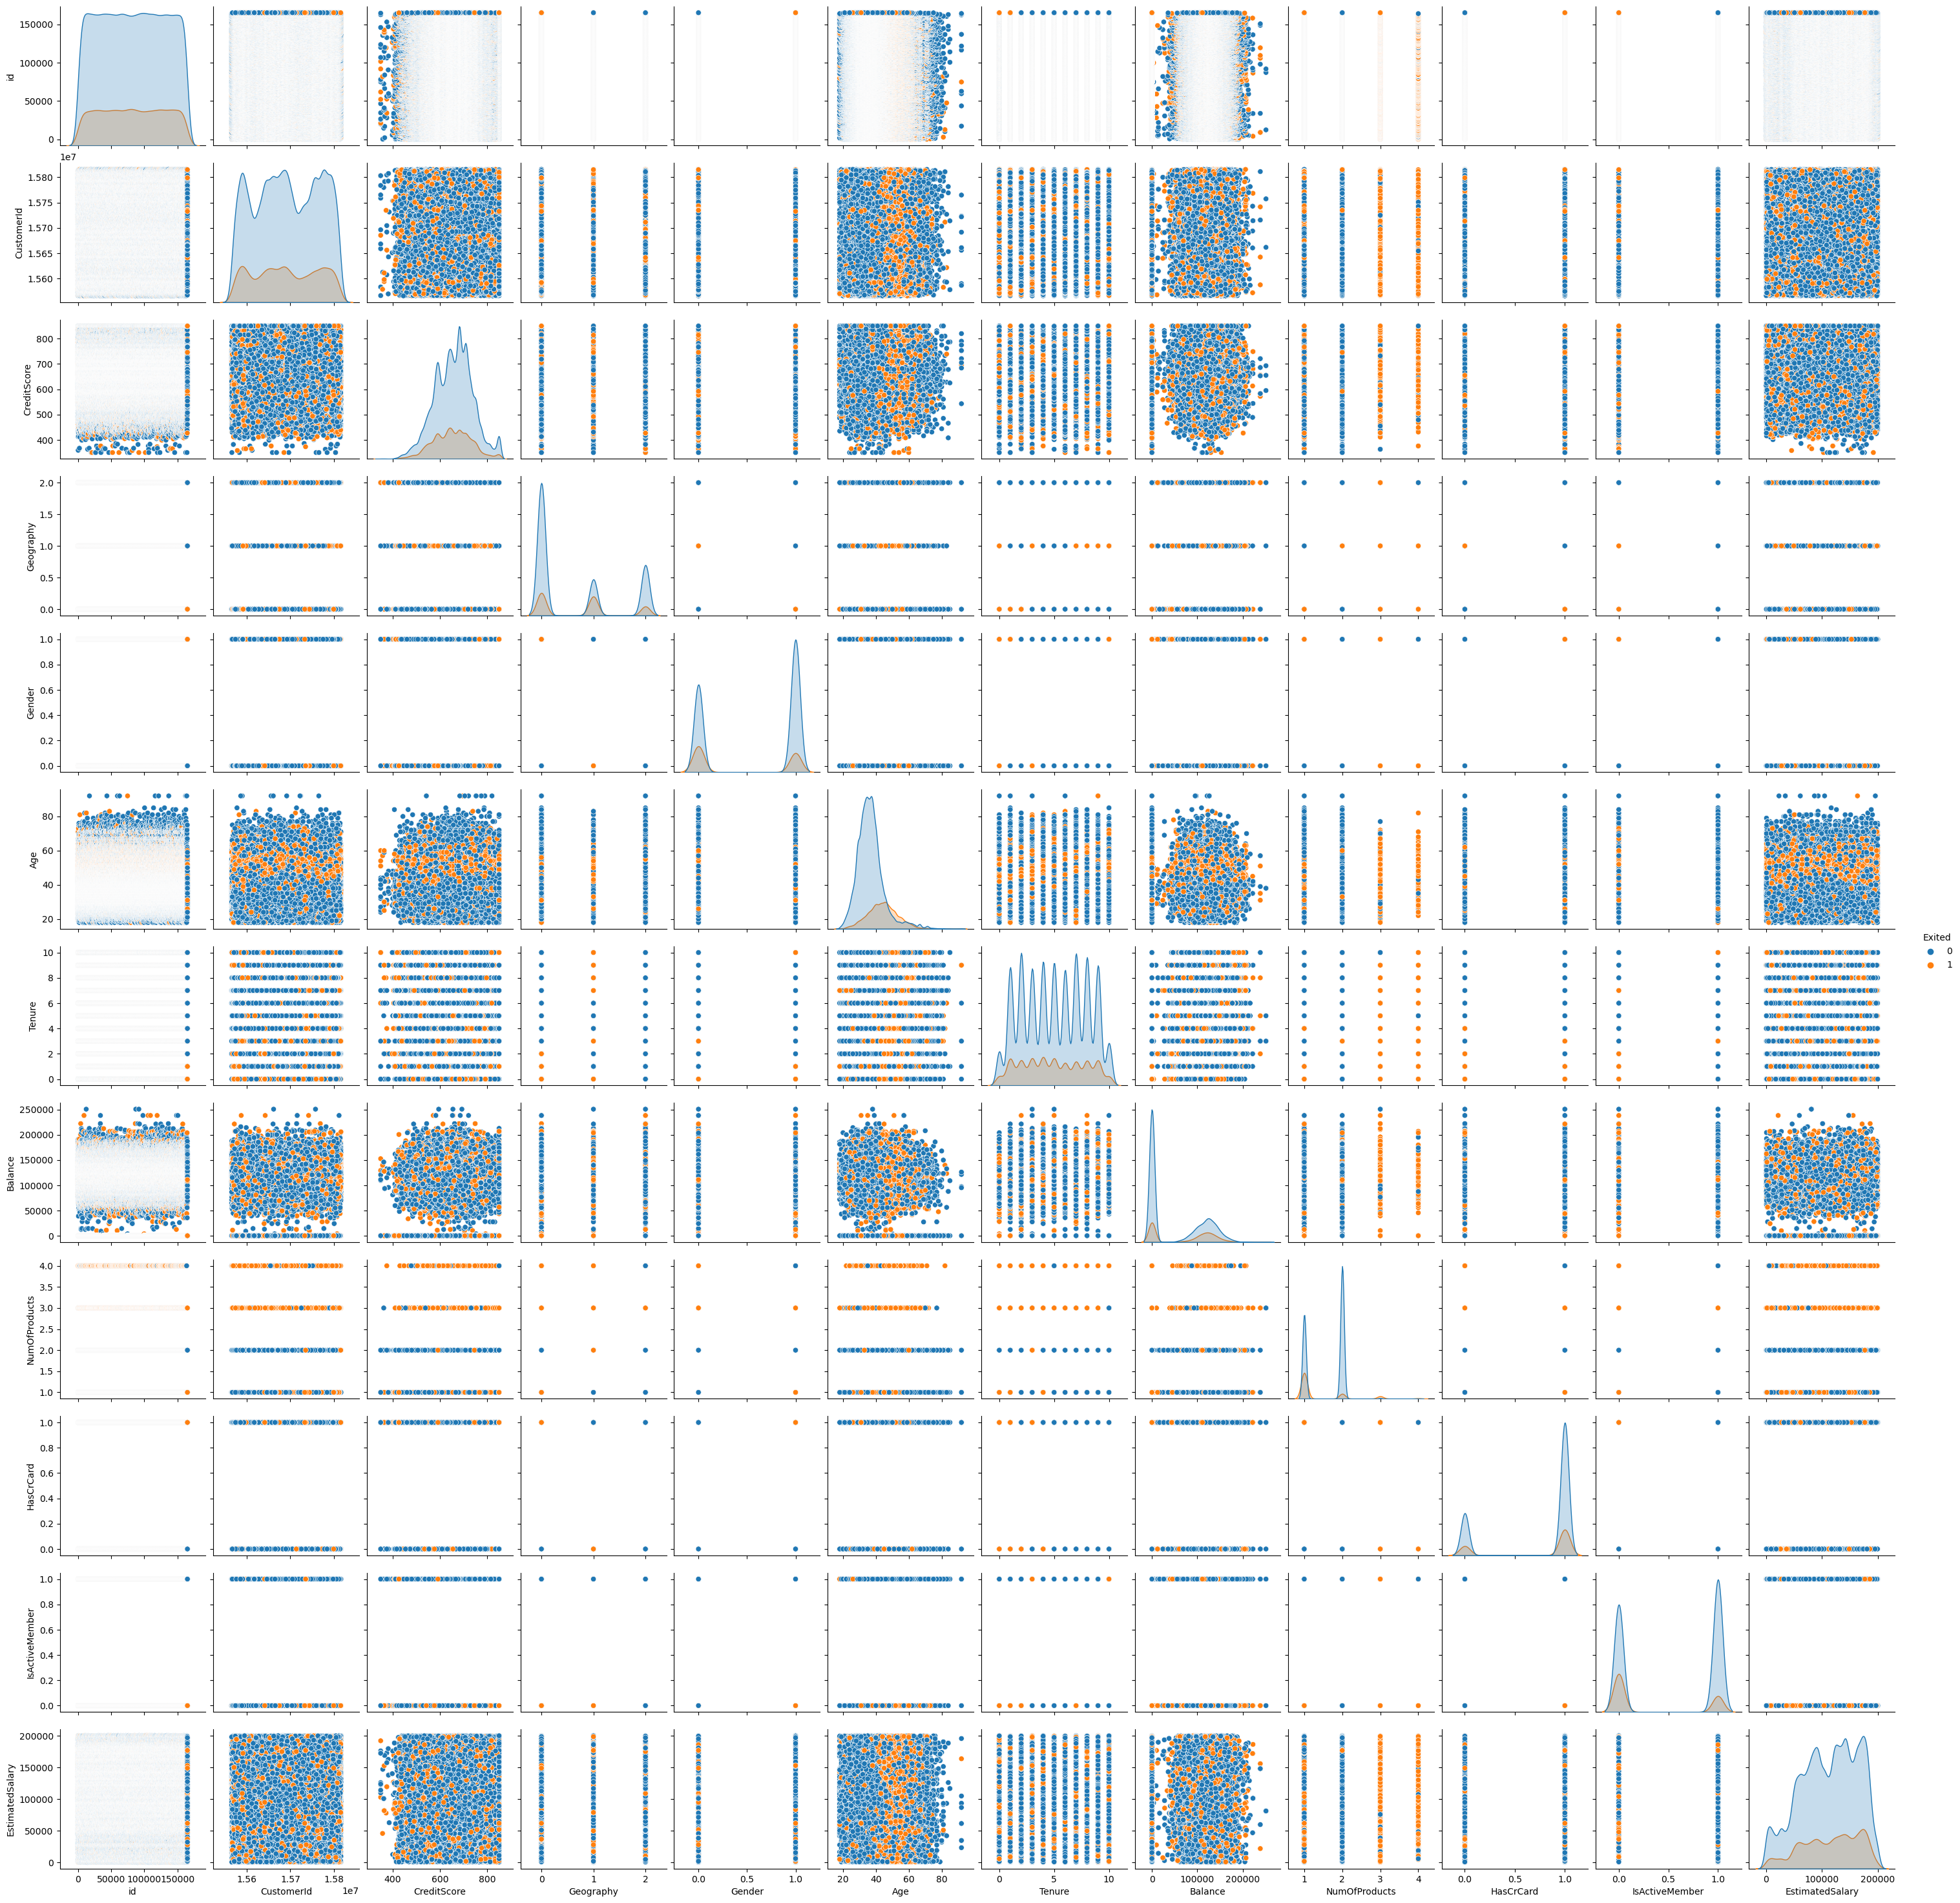

In [22]:
sb.pairplot(train,hue='Exited')

In [38]:
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [44]:
columns_drop=['CustomerId', 'Surname']
train.drop(columns=columns_drop,inplace= True)

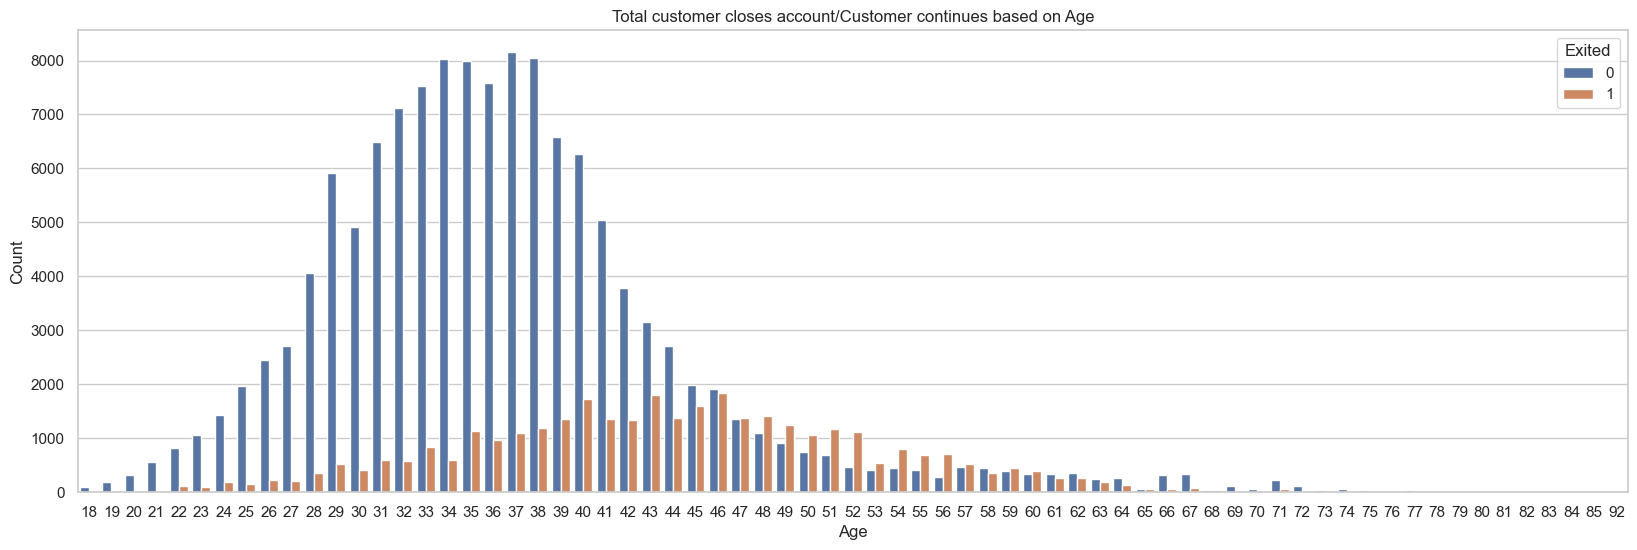

In [45]:
sb.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sb.countplot(x='Age', hue='Exited', data=train)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Total customer closes account/Customer continues based on Age')

# Show the plot
plt.show()

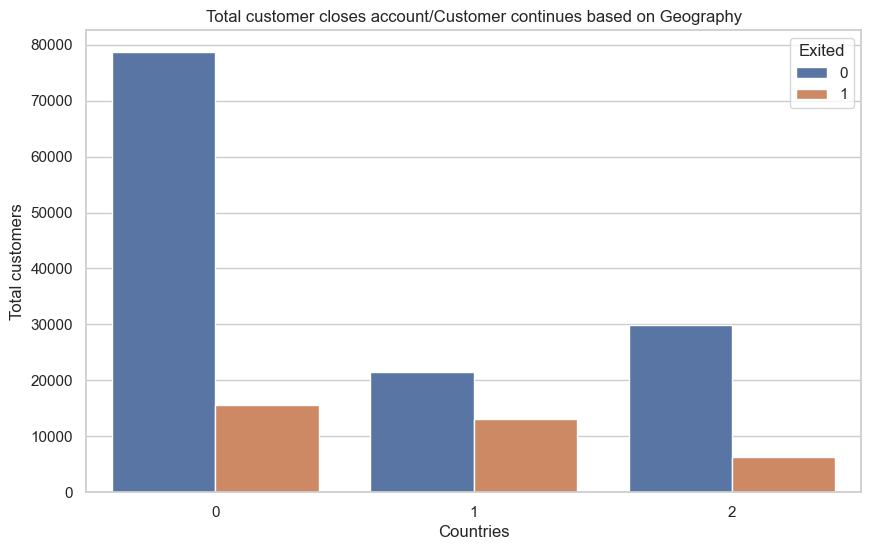

In [46]:
sb.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sb.countplot(x='Geography', hue='Exited', data=train)

# Set labels and title
plt.xlabel('Countries')
plt.ylabel('Total customers')
plt.title('Total customer closes account/Customer continues based on Geography')

# Show the plot
plt.show()

## training and testing split 

In [47]:
X=train.iloc[:,train.columns != 'Exited']
y=train['Exited']

In [48]:
X.head()

id  CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0   0          668          0       1   33       3       0.00              2   
1   1          627          0       1   33       1       0.00              2   
2   2          678          0       1   40      10       0.00              2   
3   3          581          0       1   34       2  148882.54              1   
4   4          716          2       1   33       5       0.00              2   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               0        181449.97  
1          1               1         49503.50  
2          1               0        184866.69  
3          1               1         84560.88  
4          1               1         15068.83

In [50]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Exited, dtype: int64

In [52]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [55]:
X_train

id  CreditScore  Geography  Gender  Age  Tenure    Balance  \
5127      5127          609          0       1   34       2       0.00   
162903  162903          736          2       1   35       8       0.00   
52185    52185          746          0       0   38       4  166883.07   
39249    39249          567          2       0   40       5       0.00   
115410  115410          631          2       0   37       6       0.00   
...        ...          ...        ...     ...  ...     ...        ...   
119879  119879          668          1       1   45       6  104576.80   
103694  103694          751          0       1   43       7       0.00   
131932  131932          753          0       0   39       7       0.00   
146867  146867          685          0       0   48       4       0.00   
121958  121958          667          1       1   35       1  135637.00   

        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
5127                1          1               1         16250.61  
162903              1          0               1         79082.62  
52185               1          0               1        194563.65  
39249               2          1               0        126537.07  
115410              3          1               1        125877.22  
...               ...        ...             ...              ...  
119879              1          1               0        113081.42  
103694              2          1               0         88866.39  
131932              2          1               0        167973.63  
146867              2          1               1         24998.75  
121958              1          0               0        140137.56  

[148530 rows x 11 columns]

In [58]:
y_train

5127      0
162903    1
52185     0
39249     0
115410    1
         ..
119879    0
103694    0
131932    0
146867    0
121958    0
Name: Exited, Length: 148530, dtype: int64

## Formulating Regressor

In [73]:
Params={
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C' :[1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50,60,70,80,90],
    'max_iter':[1000,2000,3000],
}

In [74]:
lr=LogisticRegression()

In [75]:
regressor=GridSearchCV(lr,param_grid=Params,scoring='accuracy',n_jobs=2,cv=10)

In [76]:
regressor.fit(X_train,y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1260 fits failed out of a total of 1890.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
630 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solve

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=2,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30,
                               35, 40, 50, 60, 70, 80, 90],
                         'max_iter': [1000, 2000, 3000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [77]:
regressor.best_params_

{'C': 1, 'max_iter': 1000, 'penalty': 'l2'}

In [78]:
regressor.best_score_

0.7863394600417425